<a href="https://colab.research.google.com/github/Wilson77Calixto/Aprender-praticando-Python/blob/master/Ol%C3%A1%2C_este_%C3%A9_o_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*EXERCÍCIO DE DETECÇÃO DE ANOMALIAS:*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
plt.rcParams['figure.figsize']=(15, 10)


In [5]:
# Geração de dados com o make_blobs
dados, rotulos = make_blobs(n_samples=200, centers=1, n_features=2, random_state=0, center_box=(10,10), cluster_std=.3)



In [5]:
dados[:10]

array([[10.01372756,  9.94384484],
       [ 9.6188545 , 10.29081901],
       [ 9.88453606, 10.02830548],
       [ 9.84710435,  9.86857771],
       [ 9.81157373,  9.85569186],
       [ 9.96903434, 10.12317955],
       [ 9.74163229, 10.57301949],
       [10.01158917,  9.50298547],
       [10.23153717, 10.24705125],
       [10.04648423, 10.11344876]])

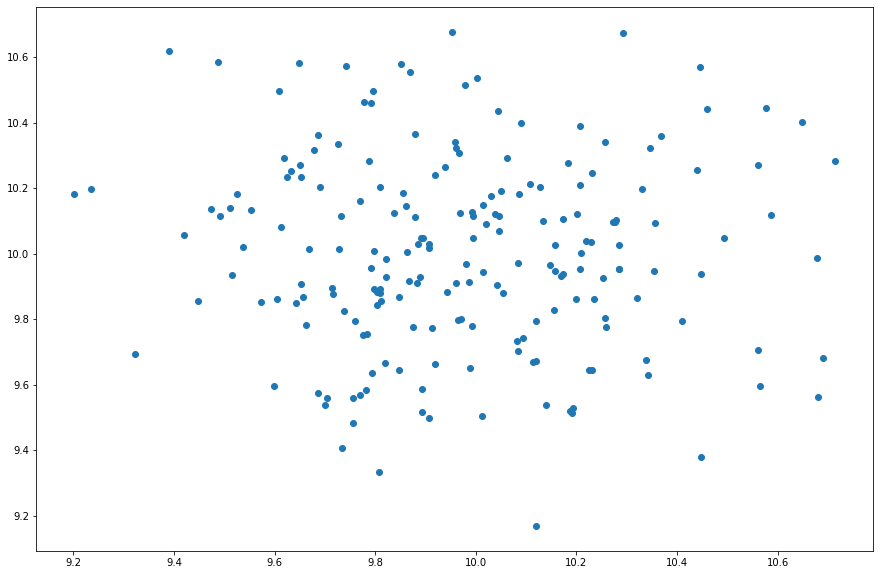

'plt.scatter(dados[:,0],dados[:,1])\nplt.show()'

In [6]:
# VisualizaçãoVisualize os dados gerados usando o gráfico de dispersão

plt.scatter(dados[:,0], dados[:,1])
plt.show()




In [7]:
k_vizinhos = 20
contaminacao = .03




'k_vizinhos = 20\ncontaminacao = .03'

In [9]:
lof = LocalOutlierFactor(n_neighbors=k_vizinhos, contamination=contaminacao)



'lof = LocalOutlierFactor(n_neighbors=k_vizinhos, contamination=contaminacao)'

In [11]:
predicao = lof.fit_predict(dados)



'predicao = lof.fit_predict(dados)'

In [12]:
predicao

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [15]:
lof_indice = np.where(predicao==-1)
anomalias = dados[lof_indice]





'lof_indice = np.where(predicao==-1) \nanomalias = dados[lof_indice]'

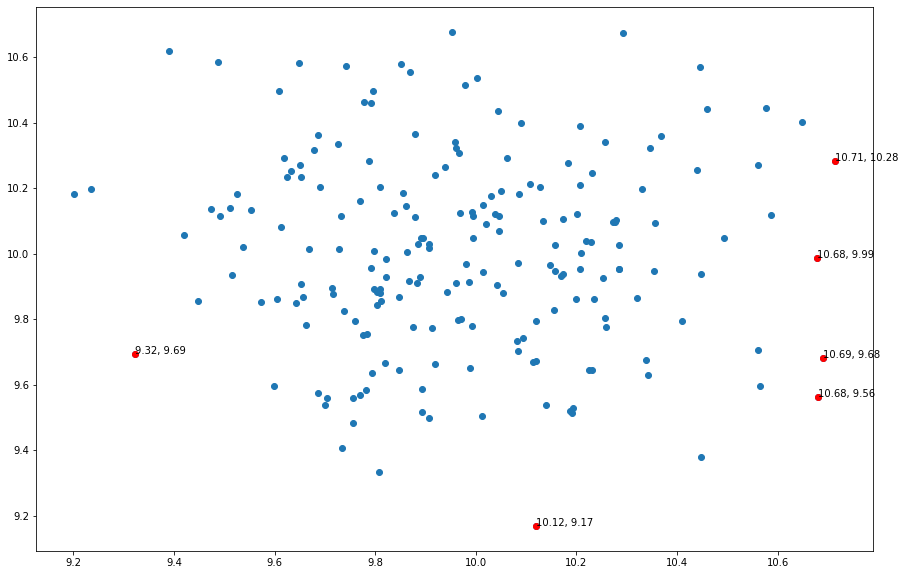

"fig, eixo = plt.subplots()\neixo.scatter(dados[:,0], dados[:,1])\neixo.scatter(anomalias[:,0], anomalias[:,1], color='red')\n#coloca os rótulos nos objetos anômalos (x, y)\nfor i, texto in enumerate(anomalias):\n  eixo.annotate('{:.2f}'.format(texto[0])+', '+'{:.2f}'.format(texto[1]), (anomalias[i,0], anomalias[i,1]))\n\nplt.show()"

In [21]:
fig, eixo = plt.subplots()
eixo.scatter(dados[:,0], dados[:,1])
eixo.scatter(anomalias[:,0], anomalias[:,1], color='red')

# Coloca os rótulos nos objetos anômalos (x, y)

for i, texto in enumerate(anomalias):
  eixo.annotate('{:.2f}'.format(texto[0])+', '+'{:.2f}'.format(texto[1]),
                (anomalias[i,0], anomalias[i,1]))
  
plt.show()  


